In [ ]:
import numpy as np
import pandas as pd
import re
import missingno

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from csv import reader

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Training data

In [ ]:
data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

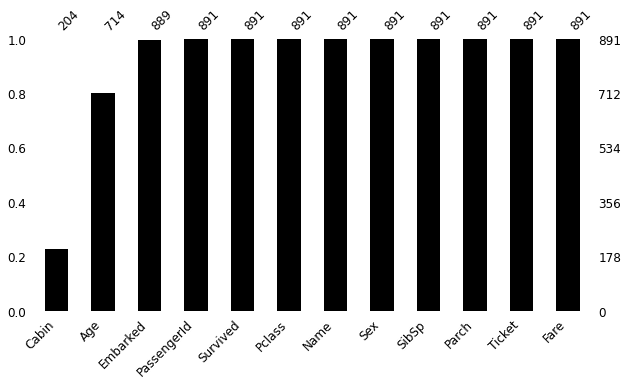

In [ ]:
missingno.bar(data, color="black", sort="ascending", figsize=(10,5), fontsize=12);

In [ ]:
# Drop 'PassengerId' from data set as data column is not relevant to survival probability
data = data.drop(['Cabin','Ticket','Name'], axis=1)

In [ ]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [ ]:
# Handling age data column missing values

print(data["Age"].isnull().sum())


177


In [ ]:
data["Age"] = data["Age"].fillna(data["Age"].median())

data["Age"] = data["Age"].astype(int)

In [ ]:
fillVal = 'S'
data['Embarked'] = data['Embarked'].fillna(fillVal)

In [ ]:
# Converting Fare from float to int
data['Fare'] = data['Fare'].fillna(0)
data['Fare'] = data['Fare'].astype(int)


In [ ]:
# Converting genders into 0 or 1
gender = {"male": 0, "female":1}
data['Sex'] = data['Sex'].map(gender)

In [ ]:
# Convering Embarked feature into numeric data
ports = {"S": 0, "C": 1, "Q": 2}
data['Embarked'] = data['Embarked'].map(ports)

In [ ]:
# Creating age group
data['Age'] = data['Age'].astype(int)
data.loc[ data['Age'] <= 11, 'Age'] = 0
data.loc[(data['Age'] > 11) & (data['Age'] <= 18), 'Age'] = 1
data.loc[(data['Age'] > 18) & (data['Age'] <= 22), 'Age'] = 2
data.loc[(data['Age'] > 22) & (data['Age'] <= 27), 'Age'] = 3
data.loc[(data['Age'] > 27) & (data['Age'] <= 33), 'Age'] = 4
data.loc[(data['Age'] > 33) & (data['Age'] <= 40), 'Age'] = 5
data.loc[(data['Age'] > 40) & (data['Age'] <= 66), 'Age'] = 6
data.loc[ data['Age'] > 66, 'Age'] = 6

In [ ]:
# Creating Fare group
data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 99), 'Fare']   = 3
data.loc[(data['Fare'] > 99) & (data['Fare'] <= 250), 'Fare']   = 4
data.loc[ data['Fare'] > 250, 'Fare'] = 5
data['Fare'] = data['Fare'].astype(int)

In [ ]:
# Adding new column for Age Class
data['Age_Class']= data['Age']* data['Pclass']
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Class
0,1,0,3,0,2,1,0,0,0,6
1,2,1,1,1,5,1,0,3,1,5
2,3,1,3,1,3,0,0,0,0,9
3,4,1,1,1,5,1,0,3,0,5
4,5,0,3,0,5,0,0,1,0,15
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,3,0,0,1,0,6
887,888,1,1,1,2,0,0,2,0,2
888,889,0,3,1,4,1,2,2,0,12
889,890,1,1,0,3,0,0,2,1,3


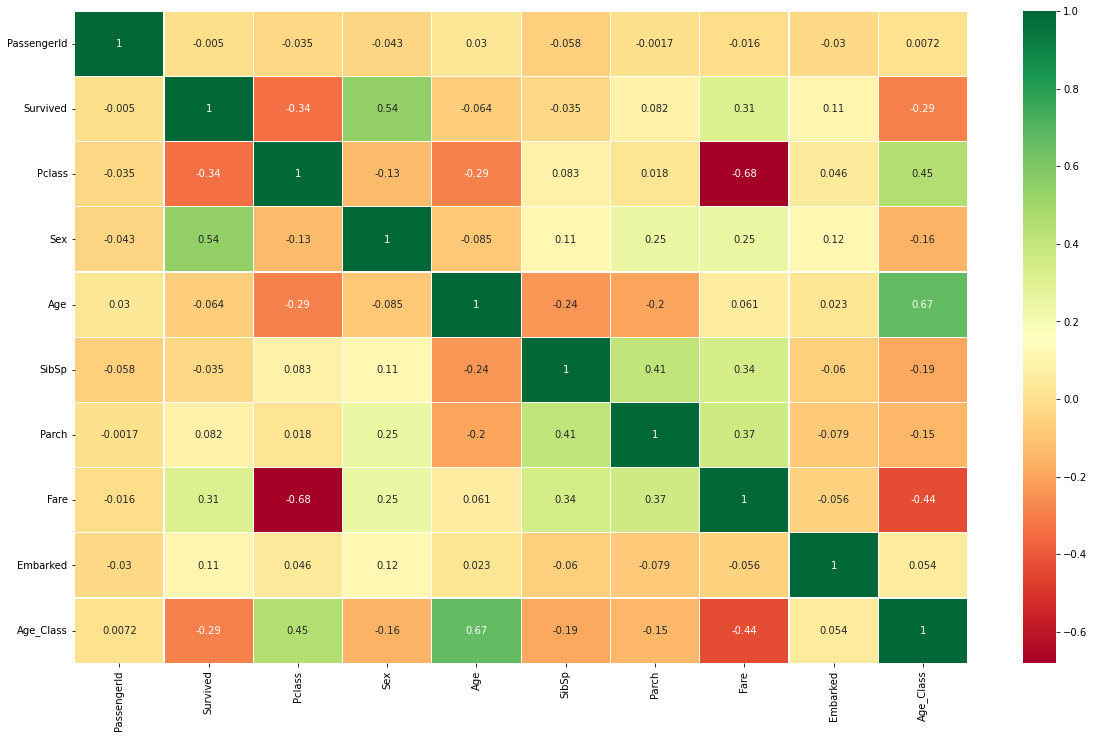

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

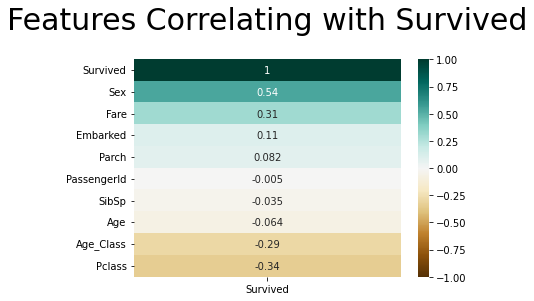

In [ ]:
heatmap = sns.heatmap(data.corr()[['Survived']].sort_values(by='Survived', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Survived', fontdict={'fontsize':30}, pad=30);

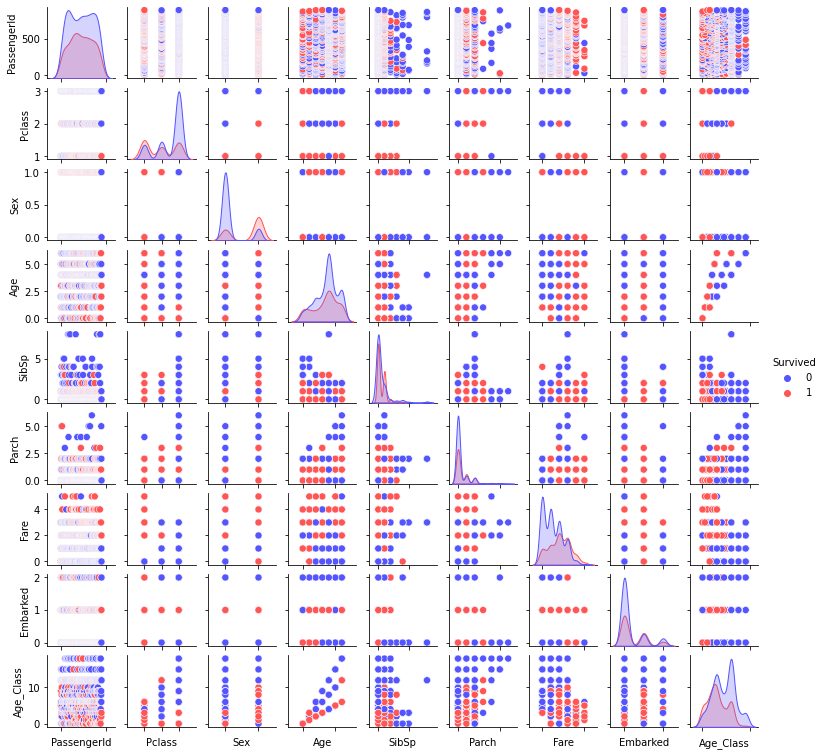

In [ ]:
g = sns.pairplot(data=data, hue='Survived', palette = 'seismic',
                 size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=50) )
g.set(xticklabels=[])

# Testing data

In [ ]:
data_test=pd.read_csv('test.csv')
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
data_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

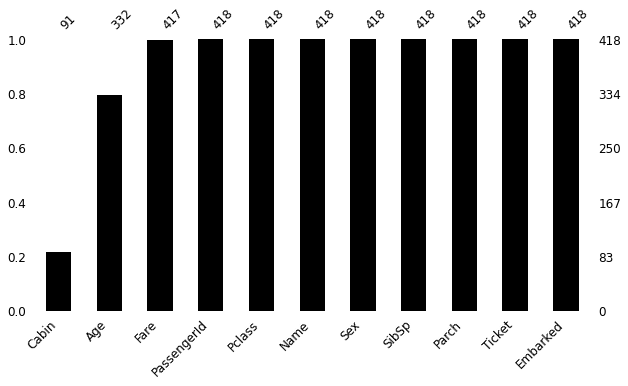

In [ ]:
missingno.bar(data_test, color="black", sort="ascending", figsize=(10,5), fontsize=12);

In [ ]:
# Drop 'PassengerId' from data set as data column is not relevant to survival probability
data_test = data_test.drop(['Cabin','Ticket','Name'], axis=1)

In [ ]:
# Handling age data column missing values

data_test["Age"].isnull().sum()

86

In [ ]:
# fill NaN values in Age column with random values generated
data_test["Age"] = data_test["Age"].fillna(data_test["Age"].median())
data_test["Age"] = data_test["Age"].astype(int)

fillVal = 'S'
data_test['Embarked'] = data_test['Embarked'].fillna(fillVal)

In [ ]:
# Converting Fare from float to int
data_test['Fare'] = data_test['Fare'].fillna(0)
data_test['Fare'] = data_test['Fare'].astype(int)


In [ ]:
# Converting genders into 0 or 1
data_test['Sex'] = data_test['Sex'].map(gender)

In [ ]:
# Convering Embarked feature into numeric data
data_test['Embarked'] = data_test['Embarked'].map(ports)

In [ ]:
# Creating age group
data_test['Age'] = data_test['Age'].astype(int)
data_test.loc[ data['Age'] <= 11, 'Age'] = 0
data_test.loc[(data['Age'] > 11) & (data_test['Age'] <= 18), 'Age'] = 1
data_test.loc[(data['Age'] > 18) & (data_test['Age'] <= 22), 'Age'] = 2
data_test.loc[(data['Age'] > 22) & (data_test['Age'] <= 27), 'Age'] = 3
data_test.loc[(data['Age'] > 27) & (data_test['Age'] <= 33), 'Age'] = 4
data_test.loc[(data['Age'] > 33) & (data_test['Age'] <= 40), 'Age'] = 5
data_test.loc[(data['Age'] > 40) & (data_test['Age'] <= 66), 'Age'] = 6
data_test.loc[ data['Age'] > 66, 'Age'] = 6

In [ ]:
# Creating Fare group
data_test.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
data_test.loc[(data['Fare'] > 7.91) & (data_test['Fare'] <= 14.454), 'Fare'] = 1
data_test.loc[(data['Fare'] > 14.454) & (data_test['Fare'] <= 31), 'Fare']   = 2
data_test.loc[(data['Fare'] > 31) & (data_test['Fare'] <= 99), 'Fare']   = 3
data_test.loc[(data['Fare'] > 99) & (data_test['Fare'] <= 250), 'Fare']   = 4
data_test.loc[ data['Fare'] > 250, 'Fare'] = 5
data_test['Fare'] = data['Fare'].astype(int)

In [ ]:
# Adding new column for Age Class
data_test['Age_Class']= data_test['Age']* data_test['Pclass']
data_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Class
0,892,3,0,0,0,0,0,2,0
1,893,3,1,0,1,0,3,0,0
2,894,2,0,0,0,0,0,2,0
3,895,3,0,0,0,0,3,0,0
4,896,3,1,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,0,0,0,0,0
414,1306,1,1,0,0,0,0,1,0
415,1307,3,0,0,0,0,1,0,0
416,1308,3,0,0,0,0,3,0,0


# Algorithms

**Logistic regression**

In [ ]:
results = []

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
def sType(str):
  if (str == '1'):
    return "Survived"
  else:
    return "Deceased"


In [ ]:
def printPrediction(predList):
  i = 1
  s = ""
  for cell in predList:
    s = s + (sType(str(cell)) + " ")
    lst = s.split()
    i = i + 1
  return lst

In [ ]:
def logRegression(train1,train2,test):
  model = LogisticRegression()
  model.fit(train1, train2)
  prediction = model.predict(test)
  global predLog
  predLog = prediction
  accuracy = round(model.score(train1,train2)*100,2)
  data = printPrediction(prediction)
  df=pd.DataFrame( list(reader(data)))
  df.columns=['Survived']
  print("Model Accuracy:" + str(accuracy)+"%"+ '\n')
  results.append(accuracy)
  return df


In [ ]:
train1 = data.drop("Survived", axis = 1)
train2 = data["Survived"]
test = data_test.copy()

logRegression(train1,train2,test)

Model Accuracy:80.7%



,Survived
0,Deceased
1,Survived
2,Deceased
3,Deceased
4,Survived
...,...
413,Deceased
414,Survived
415,Deceased
416,Deceased


**K Nearest Neighbor** 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
def KNN(train1,train2,test):
  model1 = KNeighborsClassifier(n_neighbors=3)
  model1.fit(train1,train2)
  prediction = model1.predict(test)
  global predK
  predK = prediction
  
  accuracy = round(model1.score(train1,train2)*100,2)
  data = printPrediction(prediction)
  df=pd.DataFrame( list(reader(data)))
  df.columns=['Survived']
  print("Model Accuracy:" + str(accuracy)+"%"+ '\n')
  results.append(accuracy)
  return df


In [ ]:
KNN(train1, train2 ,test)

Model Accuracy:79.91%



,Survived
0,Survived
1,Survived
2,Survived
3,Survived
4,Survived
...,...
413,Deceased
414,Deceased
415,Deceased
416,Deceased


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def rForest(train1,train2,test):
  model = RandomForestClassifier(n_estimators=100,random_state=42)
  model.fit(train1,train2)
  prediction = model.predict(test)
  global predForest
  predForest = prediction
  model.score(train1,train2)
  accuracy = round(model.score(train1,train2)*100,2)
  data = printPrediction(prediction)
  df=pd.DataFrame( list(reader(data)))
  df.columns=['Survived']
  results.append(accuracy)
  return df

In [ ]:
rForest(train1, train2 ,test)

,Survived
0,Deceased
1,Deceased
2,Survived
3,Survived
4,Survived
...,...
413,Survived
414,Survived
415,Survived
416,Survived


**SVM**

In [ ]:
from sklearn.svm import SVC, LinearSVC
def lSVM(train1,train2,test):
  model = LinearSVC()
  model.fit(train1,train2)
  prediction = model.predict(test)
  global predLSVM
  predLSVM = prediction
  accuracy = round(model.score(train1,train2)*100,2)
  data = printPrediction(prediction)
  df=pd.DataFrame( list(reader(data)))
  df.columns=['Survived']
  print("Model Accuracy:" + str(accuracy)+"%"+ '\n')
  results.append(accuracy)
  return df
lSVM(train1,train2,test)

Model Accuracy:79.91%



,Survived
0,Deceased
1,Deceased
2,Deceased
3,Deceased
4,Survived
...,...
413,Deceased
414,Survived
415,Deceased
416,Deceased


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
def dTree(train1,train2,test):
  model = DecisionTreeClassifier()
  model.fit(train1,train2)
  prediction = model.predict(test)
  global predTree
  predTree = prediction
  accuracy = round(model.score(train1,train2)*100,2)
  data = printPrediction(prediction)
  df=pd.DataFrame( list(reader(data)))
  df.columns=['Survived']
  results.append(accuracy)
  return df
dTree(train1,train2,test)

,Survived
0,Deceased
1,Deceased
2,Deceased
3,Deceased
4,Survived
...,...
413,Deceased
414,Survived
415,Deceased
416,Deceased


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
def gNaiveBayes(train1,train2,test):
  model = GaussianNB()
  model.fit(train1,train2)
  prediction = model.predict(test)
  global predBayes
  predBayes = prediction
  accuracy = round(model.score(train1,train2)*100,2)
  data = printPrediction(prediction)
  df=pd.DataFrame( list(reader(data)))
  df.columns=['Survived']
  print("Model Accuracy:" + str(accuracy)+"%"+ '\n')
  results.append(accuracy)
  return df
gNaiveBayes(train1,train2,test)

Model Accuracy:78.9%



,Survived
0,Deceased
1,Survived
2,Survived
3,Survived
4,Survived
...,...
413,Deceased
414,Survived
415,Deceased
416,Deceased


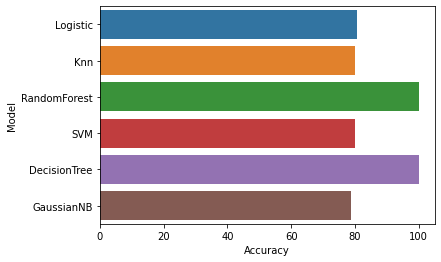

In [ ]:
model_names = ["Logistic","Knn","RandomForest","SVM","DecisionTree","GaussianNB"]
acc_of_models = {"Model": model_names, "Accuracy": results}    
acc_of_models = pd.DataFrame(acc_of_models)
acc_of_models

sns.barplot(data=acc_of_models, x="Accuracy", y="Model")

In [ ]:
gender_sub = pd.read_csv('gender_submission.csv')
gender_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
gender_sub[["PassengerId"]].head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [ ]:
y_pred = pd.DataFrame(predTree, columns = ["Survived"])
y_pred.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [ ]:
pred = pd.Series(predTree)
submission_last = pd.concat([gender_sub[["PassengerId"]],pred],axis=1)

In [ ]:
submission_last.to_csv('submission_last.csv',index=True)

In [ ]:
sub = pd.read_csv('submission_last.csv',index_col=0)
sub.columns=['PassengerId','Survived']
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
gender_sub['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [ ]:
sub['Survived'].value_counts()

0    267
1    151
Name: Survived, dtype: int64